# Trabalho IA
## Análise de emails para definição de SPAM

This Notebook defines a machine learning model using the scikit lib and exports this model for app's usage.
And also shows some cool graphs

Esse notebook define um modelo de machine learning usando a lib scikit e exporta esse modelo para uso na aplicação, além de mostrar uns gráficos legais

In [1]:
# Import what we need and reads the dataset
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

df = pd.read_csv('./data/dataset_44_spambase.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

All columns are float values, if they were text, we would need to quantify them, but in this case we don't need to do that

In [3]:
df.shape # Dataset Size

(4601, 58)

In [4]:
df.isnull().sum() # Show the count of missing values in the dataset

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In this case this dataset is already in good shape without missing values, but for the project let's assume we will remove them

In [5]:
# Let's remove
columns = df.columns
imputer = SimpleImputer()
df = pd.DataFrame(imputer.fit_transform(df), columns=columns)
df = pd.DataFrame(imputer.transform(df), columns=columns)

In [6]:
df.isnull().sum() # Show the count of missing values in the dataset

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

The last column in the dataset, the Class column, defines if that row is a spam or not
This plot show the quatity of SPAMs and not spams

<BarContainer object of 2 artists>

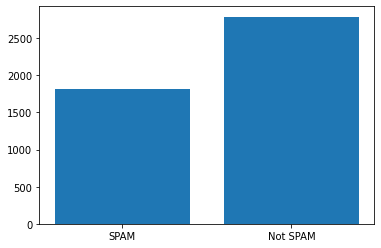

In [7]:
# This plot a bar graph showing how much spams and not spamns we have
spam_count = df['class'].value_counts()[1] # Get the occurences of 1 in column class
notspam_count = df['class'].value_counts()[0] # Get the occurences of 0

names = ['SPAM', 'Not SPAM']
values = [spam_count, notspam_count]

plt.bar(names, values)

In [8]:
# Separação de valores
X = df.drop(['class'], axis = 1)
y = df['class']


In [9]:
from sklearn.model_selection import train_test_split

# Separação de dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Usaremos Arvore de decisão
model = DecisionTreeClassifier(criterion='entropy', max_depth=5)

# Treina o modelo de fato
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [11]:
# Predicta
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       849
         1.0       0.90      0.83      0.86       532

    accuracy                           0.90      1381
   macro avg       0.90      0.89      0.89      1381
weighted avg       0.90      0.90      0.90      1381



In [13]:
# Exporta o modelo

## Joblib pelo sklearn.externals foi removido o código abaixo
# from sklearn.externals import joblib
## Não funciona mais
import joblib

joblib.dump(model, 'model/model.pkl')

['model/model.pkl']

In [9]:
# Test ready model
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

model = joblib.load("model/model.pkl")
df = pd.read_csv('./data/dataset_44_spambase.csv')

X = df.drop(['class'], axis = 1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

predict = model.predict(X_test)
predict

array([0., 0., 0., ..., 1., 0., 0.])